In [42]:
# Load modules
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import tree, neighbors
import pandas as pd

# Load dataset
df = pd.read_csv(r"C:\Users\user\Desktop\Linkedin Learning\Django\Django-Iris\iris.csv")

df.head()

,sepal_length,sepal_width,petal_length,petal_width,classification
0,5.4,3.7,1.5,0.2,Iris-setosa
1,4.8,3.4,1.6,0.2,Iris-setosa
2,4.8,3.0,1.4,0.1,Iris-setosa
3,4.3,3.0,1.1,0.1,Iris-setosa
4,5.8,4.0,1.2,0.2,Iris-setosa


In [63]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [43]:
df.groupby('classification').size()

classification
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

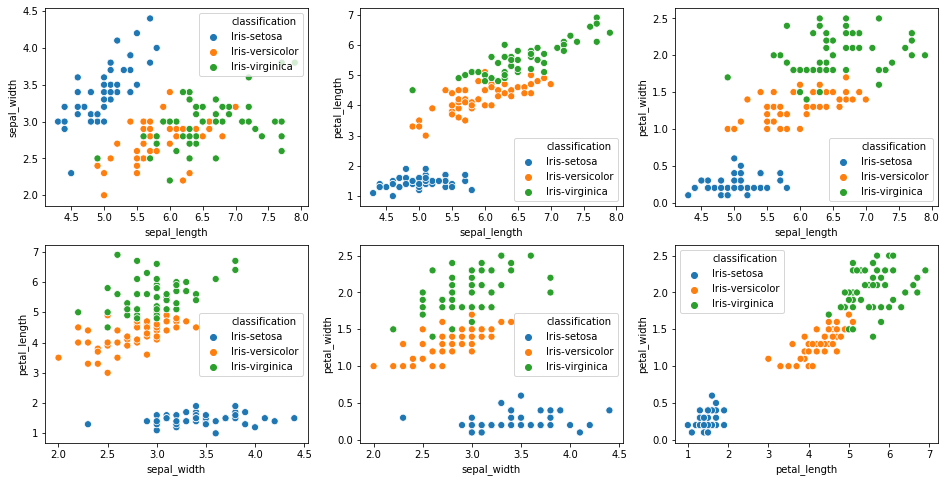

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (16, 8))
ax = plt.subplot(2,3,1)
sns.scatterplot(data=df, x="sepal_length", y="sepal_width", hue="classification", s=50, ax= ax)
ax = plt.subplot(2,3,2)
sns.scatterplot(data=df, x="sepal_length", y="petal_length", hue="classification", s=50, ax= ax)
ax = plt.subplot(2,3,3)
sns.scatterplot(data=df, x="sepal_length", y="petal_width", hue="classification", s=50, ax= ax)
ax = plt.subplot(2,3,4)
sns.scatterplot(data=df, x="sepal_width", y="petal_length", hue="classification", s=50, ax= ax)
ax = plt.subplot(2,3,5)
sns.scatterplot(data=df, x="sepal_width", y="petal_width", hue="classification", s=50, ax= ax)
ax = plt.subplot(2,3,6)
sns.scatterplot(data=df, x="petal_length", y="petal_width", hue="classification", s=50, ax= ax)

plt.legend()
plt.show()

In [57]:
# Split into training data and test data
X = df[['sepal_length','sepal_width','petal_length','petal_width']]
y = df['classification']

# Create training and testing vars, It’s usually around 80/20 or 70/30.
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Now we’ll fit the model on the training data
model_SVC = SVC(gamma='auto')
model_tree = tree.DecisionTreeClassifier()
model_knn = neighbors.KNeighborsClassifier()

model_SVC.fit(X_train, Y_train)
model_tree.fit(X_train, Y_train)
model_knn.fit(X_train, Y_train)

# Make predictions on validation dataset
predictions_SVC = model_SVC.predict(X_test)
predictions_tree = model_tree.predict(X_test)
predictions_knn = model_knn.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score
print('The aaccuracy of SVC is:', round(accuracy_score(Y_test, predictions_SVC)* 100, 2), '%')
print('The aaccuracy of Decision Tree is:', round(accuracy_score(Y_test, predictions_tree)* 100, 2), '%')
print('The aaccuracy of KNN method is:', round(accuracy_score(Y_test, predictions_knn)* 100, 2), '%')

The aaccuracy of SVC is: 96.67 %
The aaccuracy of Decision Tree is: 96.67 %
The aaccuracy of KNN method is: 100.0 %


In [59]:
# Pickle model 
pd.to_pickle(model_SVC, r'C:\Users\user\Desktop\Linkedin Learning\Django\Django-Iris\SVC.pickle')
pd.to_pickle(model_tree,r'C:\Users\user\Desktop\Linkedin Learning\Django\Django-Iris\TREE.pickle')
pd.to_pickle(model_knn,r'C:\Users\user\Desktop\Linkedin Learning\Django\Django-Iris\KNN.pickle')

In [62]:
# Unpickle model 
#model = pd.read_pickle(r'C:\Users\user\Desktop\Linkedin Learning\Django\Django-Iris\SVC.pickle')
model = pd.read_pickle(r'C:\Users\user\Desktop\Linkedin Learning\Django\Django-Iris\Decision Tree.pickle')
#model = pd.read_pickle(r'C:\Users\user\Desktop\Linkedin Learning\Django\Django-Iris\KNN.pickle')
# read a pickle pd.read_pickle('model.pkl')

# Take input from user
sepal_length = float(input("Enter sepal_length: "))
sepal_width = float(input("Enter sepa_width: "))
petal_length = float(input("Enter petal_length: "))
petal_width = float(input("Enter petal_width: "))

result = model.predict([[sepal_length,sepal_width,petal_length,petal_width]])  # input must be 2D array
print(result)

Enter sepal_length: 1
Enter sepa_width: 1
Enter petal_length: 1
Enter petal_width: 1
['Iris-setosa']
